Cleaned data loaded
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746

Confusion Matrix:
 [[55263  1388]
 [   12    83]]


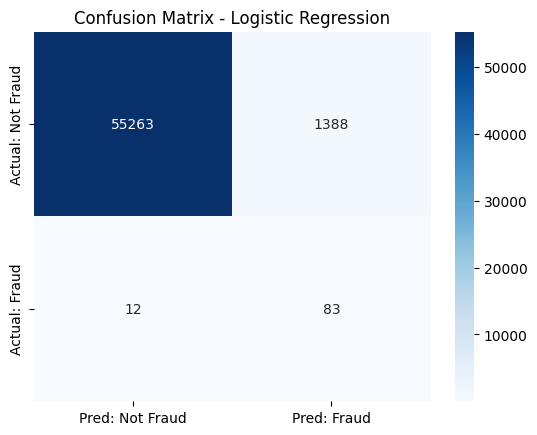

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv('../data/creditcard_cleaned.csv')
print("Cleaned data loaded")

# Separate features and target
X = df.drop(columns=['is_fraud'])
y = df['is_fraud'].astype(int)

# Scale features (important for logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train logistic regression model with class balancing
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred: Not Fraud', 'Pred: Fraud'],
            yticklabels=['Actual: Not Fraud', 'Actual: Fraud'])
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## Model Performance Summary 

We trained a logistic regression model on the cleaned credit card data using class weighting and feature scaling to handle extreme class imbalance.

### Confusion Matrix

|                         | Predicted Not Fraud | Predicted Fraud |
|-------------------------|---------------------|-----------------|
| **Actual Not Fraud**    | 55,263 ✅            | 1,388 ❌ (False Positives) |
| **Actual Fraud**        | 12 ❌ (False Negatives) | 83 ✅ (True Positives) |

- **Total samples**: 56,746  
- **Fraud cases**: 95 (≈0.17%)  
- **Legit cases**: 56,651

---

### Classification Report (Class 1 = Fraud)

| Metric      | Score     |
|-------------|-----------|
| **Precision** | 0.06 ❌ |
| **Recall**    | 0.87 ✅ |
| **F1 Score**  | 0.11 ❌ |
| **Accuracy**  | ~98% ✅ |

- **Precision**: Very low, most fraud predictions were false alarms (only 83 out of 1,471 were correct)
- **Recall**: Excellent, caught 87% of all real frauds
- **F1 Score**: Low due to imbalance between precision and recall

---

### Interpretation

- The model **prioritizes recall**: it catches most frauds (only missed 12), which is valuable when detecting fraud is critical
- However, **it triggers too many false positives** over 1,300 legit transactions were wrongly flagged
- This makes the model unsuitable for production alerting, but useful for bulk screening or as a first-pass filter

---

### Notes

- Logistic regression is fast (trained in ~2 seconds)
- It's easy to interpret and serves as a strong **baseline**
- Could be improved with:
  - Threshold tuning
  - Feature selection
  - Ensemble methods (e.g., Random Forest, XGBoost)

---

### Conclusion

Logistic Regression is a high-recall, low-precision model suitable as a baseline and good for demonstration, but not yet ideal for real-world deployment.
